In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [32]:
numerical = [int(dir) for dir in os.listdir('results/from_device')]
numerical.sort()
l = [str(dir) for dir in numerical]

In [47]:
def results_generator(l, basedir):
    for d in l:
        cur_dir = os.path.join(basedir, d)
        with open(cur_dir, 'r') as file:
            elems = file.read().split('\n')[:-1]
            elems = [float(e) for e in elems]
            m = sum(elems) / len(elems)
            yield m

results1 = list(results_generator(l, 'results/from_device/'))
results2 = list(results_generator(l, 'results/from_host/'))
results3 = list(results_generator(l, 'results/untouched/'))
results4 = list(results_generator(l, 'results/device_mem/'))
results5 = list(results_generator(l, 'results/device_initialized_mem/'))

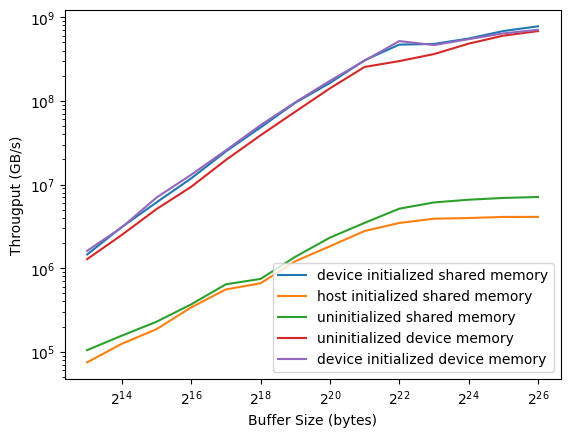

In [53]:
plt.xscale('log', base=2)
plt.yscale('log', base=10)
plt.xlabel('Buffer Size (bytes)')
plt.ylabel('Througput (GB/s)')
plt.plot(numerical, results1, label='device initialized shared memory')
plt.plot(numerical, results2, label='host initialized shared memory')
plt.plot(numerical, results3, label='uninitialized shared memory')
plt.plot(numerical, results4, label='uninitialized device memory')
plt.plot(numerical, results5, label='device initialized device memory')
plt.legend()
plt.show()

In [60]:
numerical = [int(dir) for dir in os.listdir('results/cooperative')]
numerical.sort()
numerical = numerical[1:]
l = [str(dir) for dir in numerical]

results1 = list(results_generator(l, 'results/cooperative/'))
results2 = list(results_generator(l, 'results/dynamic/'))
results3 = list(results_generator(l, 'results/host/'))

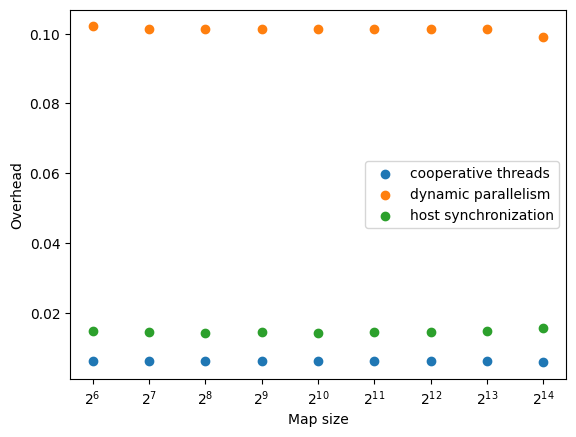

In [62]:
plt.xscale('log', base=2)
plt.xlabel('Map size')
plt.ylabel('Overhead')
plt.scatter(numerical, results1, label='cooperative threads')
plt.scatter(numerical, results2, label='dynamic parallelism')
plt.scatter(numerical, results3, label='host synchronization')
plt.legend()
plt.show()